# Thompson Sampling

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [31]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [32]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0]*d
numbers_of_rewards_0 = [0]*d
total_reward = 0
for n in range (0,N):
  ad = 0
  max_random = 0
  for i in range (0,d):
    reward_beta = random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
    if (reward_beta > max_random):
      max_random = reward_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward == 1:
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

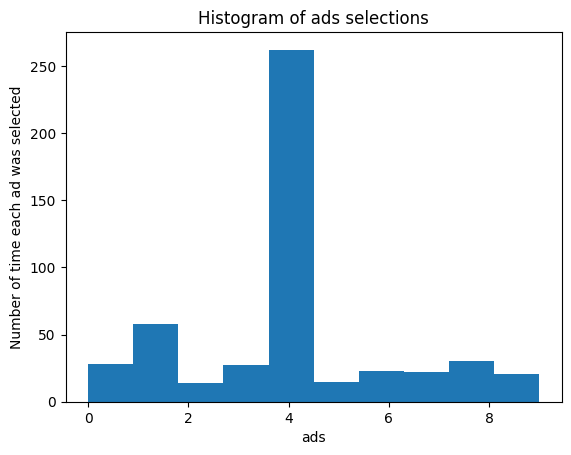

In [33]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('Number of time each ad was selected')
plt.show()